In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import umap
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE

### Data Preparation

In [38]:
originalData = pd.read_csv('Data\data.csv')
data_types = originalData.dtypes
categorical_features = (data_types[data_types == 'int64'].index).drop('id')
numerical_features = data_types[data_types == 'float64'].index
data = originalData.drop("id", axis=1)
print("Number of nulls: ", data.isna().sum().sum())

Number of nulls:  0


In [39]:
data.head().T

,0,1,2,3,4
f_00,-0.389420,-0.689249,0.809079,-0.500923,-0.671268
f_01,-0.912791,-0.453954,0.324568,0.229049,-1.039533
f_02,0.648951,0.654175,-1.170602,0.264109,-0.270155
f_03,0.589045,0.995248,-0.624491,0.231520,-1.830264
f_04,-0.830817,-1.653020,0.105448,0.415012,-0.290108
f_05,0.733624,0.863810,0.783948,-1.221269,-1.852809
f_06,2.258560,-0.090651,1.988301,0.138850,0.781898
f_07,2.000000,2.000000,5.000000,6.000000,8.000000
f_08,13.000000,3.000000,11.000000,2.000000,7.000000
f_09,14.000000,6.000000,5.000000,13.000000,5.000000


In [40]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
f_00,98000.0,0.001220,1.002801,-4.732235,-0.675226,0.002022,0.677271,4.490521
f_01,98000.0,0.005580,1.000742,-4.202795,-0.670985,0.006650,0.677746,4.324974
f_02,98000.0,-0.001042,1.001373,-4.377021,-0.672779,-0.000324,0.677086,4.560247
f_03,98000.0,-0.000700,1.000422,-4.010826,-0.672540,-0.003185,0.672097,4.399373
f_04,98000.0,-0.003522,1.003061,-4.535903,-0.682510,-0.003307,0.677589,4.050549
f_05,98000.0,-0.001612,1.000532,-4.300767,-0.675066,0.001024,0.673344,4.710316
f_06,98000.0,-0.003042,0.997434,-4.894525,-0.680421,-0.002053,0.668112,3.998595
f_07,98000.0,5.545918,3.691840,0.000000,3.000000,5.000000,8.000000,32.000000
f_08,98000.0,6.763061,4.152348,0.000000,4.000000,6.000000,9.000000,30.000000
f_09,98000.0,8.193163,5.904919,0.000000,4.000000,7.000000,11.000000,44.000000


<AxesSubplot: >

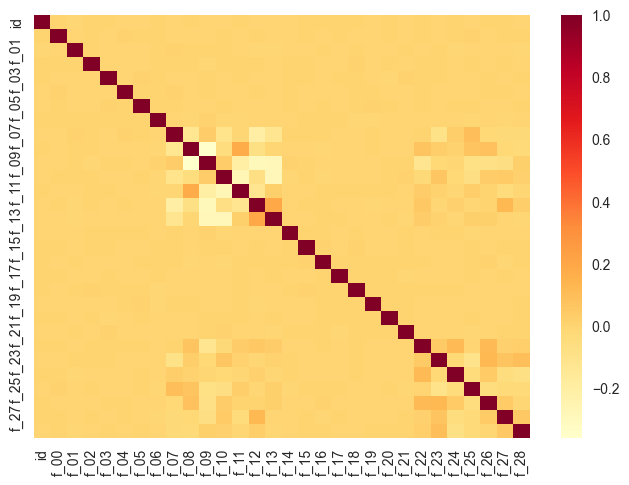

In [41]:
sns.heatmap(originalData.corr(), cmap='YlOrRd')

In [42]:
scaler = StandardScaler()
encoder = OneHotEncoder()
data[numerical_features] = scaler.fit_transform(data[numerical_features])
encoded_data = encoder.fit_transform(data[categorical_features])


#### Reordering columns so that numerical features are first and then categorical features

In [43]:
reorder = list(numerical_features) + list(categorical_features)
data = data[reorder]


#### Feature Selection Using PCA
6 Components seem to be a great choice due to the fact that they explain 82% of variance and any further addition of components provides very little new explained variance.\
See the analysis and graph below.

[0.2711328219475408, 0.4289765121078055, 0.573124232050781, 0.6644552126349285, 0.7470790997243888, 0.8235414392228791, 0.8664974965802679, 0.8740212299184115, 0.8811089222477637, 0.887333445258495, 0.8933084962102458, 0.8996586606759721, 0.9058072104689885, 0.9119644868908909, 0.9180738596028263, 0.9243386948642458, 0.9305237973750013, 0.9366315848040675, 0.9427650886275111, 0.9488254994215035, 0.9548511114255361, 0.9608666490066464, 0.9668469160992441, 0.9728105476273748, 0.9786910223855311, 0.9844560806761808, 0.9899775177862646, 0.9950870343028627, 1.0000000000000002]


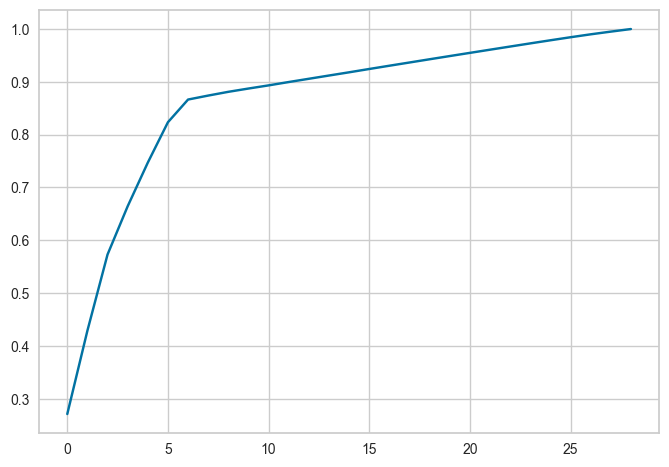

In [44]:
scores = []
for i in range(1, 30):
    testData = data.copy()
    decomposer = PCA(n_components=i)
    decomposer.fit_transform(testData)
    scores.append(sum(decomposer.explained_variance_ratio_))
print(scores)
plt.plot(scores)

In [45]:
NO_OF_COMPONENTS = 6
names = ["Principal Component {}".format(i) for i in range(1, NO_OF_COMPONENTS+1)]
decomposer = PCA(n_components=NO_OF_COMPONENTS)
dataPCA = decomposer.fit_transform(data)
#Explained variance 
explainedVariance = sum(decomposer.explained_variance_ratio_)
dataPCA = pd.DataFrame(dataPCA, columns=names)
print("Explained variance: ", explainedVariance*100, "%")


Explained variance:  82.35414392155592 %


#### Hyper parameter selection
From the analyis below, we are suggested that best k would be 7 from the elbow graph, however the graph is pretty smooth so we will try to get more insight from the silhouette score and DB index.\
The Silhouette score graph looks pretty strange and inconclusive, would suggest that k=2 is the best choice.\
Luckily the DB index graph is more conconclusive and is the lowest around k=6, which fits our previous suggestion from elbow plot.\
And so we will settle for k = 7 for our further classification

In [46]:
newData = data.iloc[:, 0:-1].to_numpy()
newDataPCA = dataPCA.iloc[:, 0:-1].to_numpy()

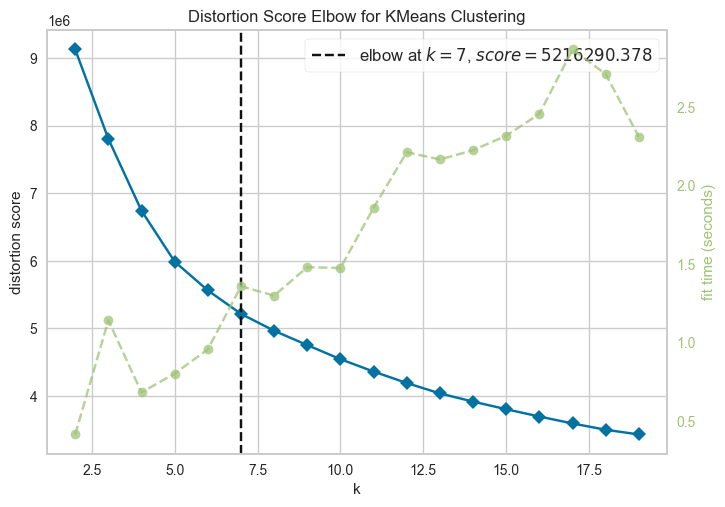

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 20), timings=True)
visualizer.fit(newDataPCA)
visualizer.show()

In [48]:
k_range = range(2, 10)

silhouetteScores = []
DBindexScores = []

for k in tqdm(k_range):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(newDataPCA)
    score1 = silhouette_score(newDataPCA, labels, metric='euclidean')
    score2 = davies_bouldin_score(newDataPCA, labels)
    silhouetteScores.append((k, score1))
    DBindexScores.append((k, score2))

ax_x, ax_y = zip(*silhouetteScores)
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
plt.xticks(k_range)
plt.grid()
plt.plot(ax_x, ax_y)

ax_x, ax_y = zip(*DBindexScores)
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
plt.xticks(k_range)
plt.grid()
plt.plot(ax_x, ax_y)

  0%|          | 0/8 [00:00<?, ?it/s]

KeyboardInterrupt: 

### Kmeans

#### Performing Clustering

In [51]:
MODELKMEANS = KMeans(n_clusters=7)
CLUSTERS = MODELKMEANS.fit_predict(dataPCA)
originalData["Cluster"] = CLUSTERS
result = originalData.filter(["id", "Cluster"])
result.to_csv("Data\KmeansResult.csv", index=False)

#### Visualize clusters

<AxesSubplot: xlabel='Principal Component 1', ylabel='Principal Component 2'>

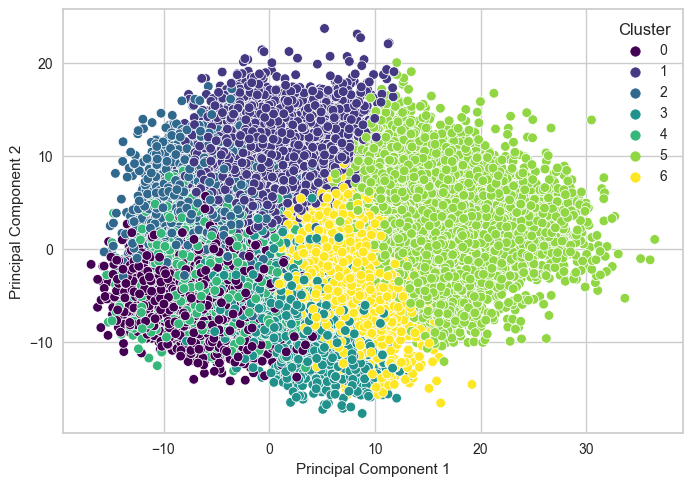

In [52]:
labels = MODELKMEANS.fit_predict(dataPCA)
dataPCA['Cluster'] = labels
sns.scatterplot(x="Principal Component 1", y="Principal Component 2", hue = 'Cluster',  data=dataPCA, palette='viridis')

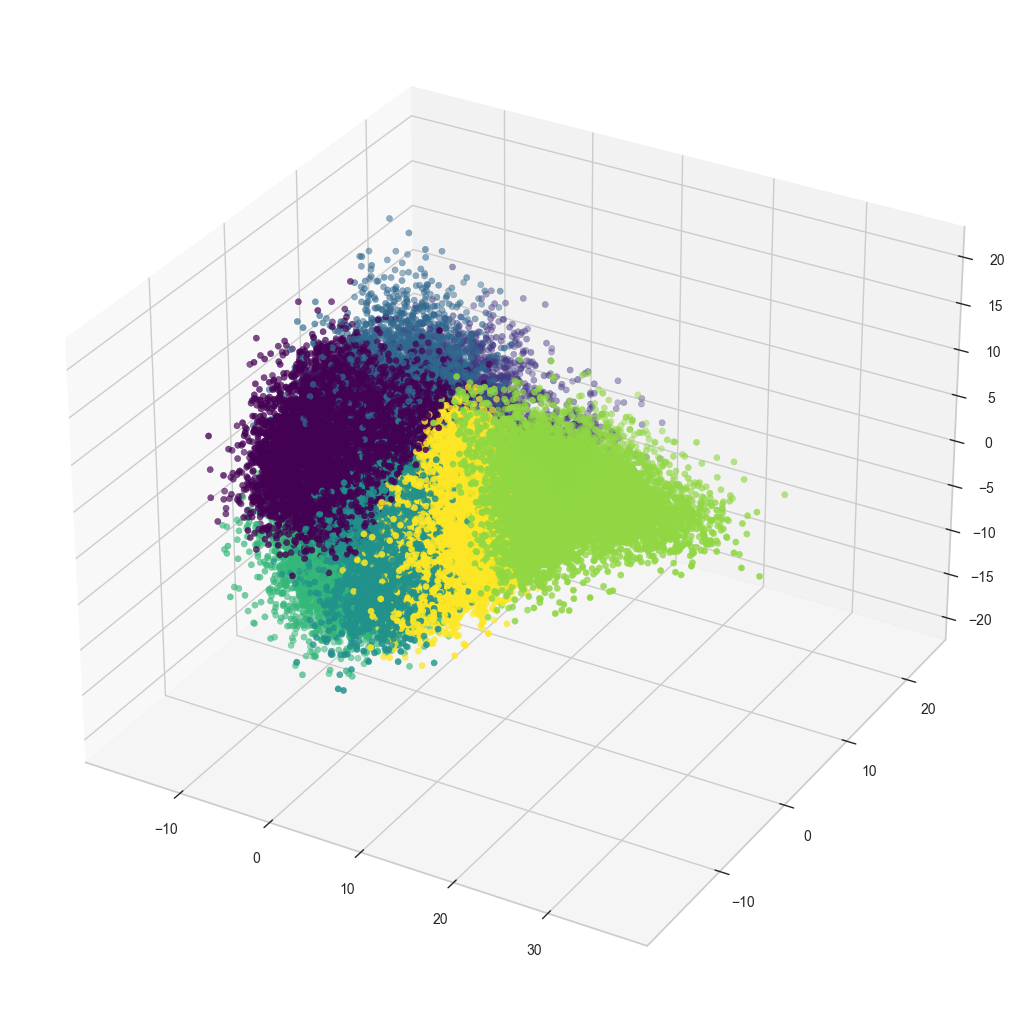

In [53]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(dataPCA["Principal Component 1"], dataPCA["Principal Component 2"], dataPCA["Principal Component 3"], c = dataPCA['Cluster'], cmap='viridis')

I used t-SNE and uMAP to visualize the clusters because they are known to focus on keeping the local structure of clusters and so I thought that while reducing the dimensionality to 2 it would show the clusters clearly which it kind of did but not perfectly, which is to be expected with clusters that required so many dimensions to express 80% of their variance. we can see that 1 cluster tends to drift away and collapse into another.

In [55]:
tsne = TSNE(n_components=2, perplexity=50, learning_rate=100, n_iter=1000, verbose=1)
tsneData = dataPCA.copy()
tsne_results = tsne.fit_transform(tsneData)
tsneData['tsne-2d-one'] = tsne_results[:,0]
tsneData['tsne-2d-two'] = tsne_results[:,1]
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue = 'Cluster',  data=tsneData, palette='viridis')


c:\Users\tymon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 98000 samples in 0.166s...
[t-SNE] Computed neighbors for 98000 samples in 21.427s...


KeyboardInterrupt: 

<AxesSubplot: xlabel='umap-2d-one', ylabel='umap-2d-two'>

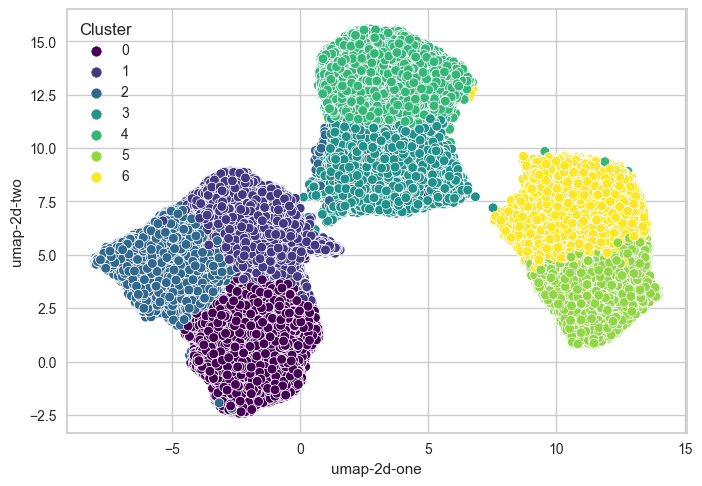

In [56]:
reducer = umap.UMAP(n_neighbors=50, min_dist=0.3, n_components=2)
umapData = dataPCA.copy()
embedding = reducer.fit_transform(umapData)
umapData['umap-2d-one'] = embedding[:,0]
umapData['umap-2d-two'] = embedding[:,1]
sns.scatterplot(x="umap-2d-one", y="umap-2d-two", hue = 'Cluster',  data=umapData, palette='viridis')

#### Expressing cluster similarity

##### With cosine similarity

<AxesSubplot: >

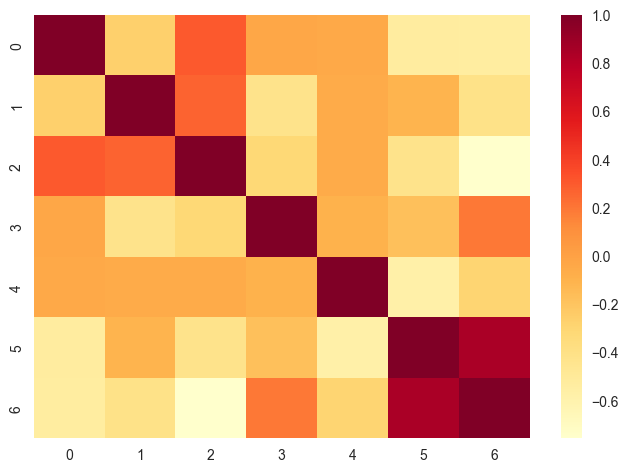

In [58]:
sns.heatmap(cosine_similarity(MODELKMEANS.cluster_centers_), cmap='YlOrRd')

### DBSCAN

I don't know, this doesn't seem to work no matter how i tune the parameters or prepare the data

##### Chosing Parameters

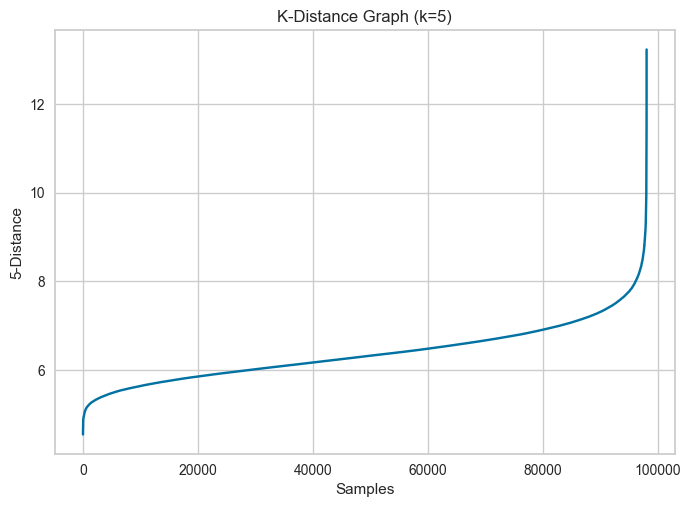

In [59]:
k = 5
nbrs = NearestNeighbors(n_neighbors=k+1).fit(data)
distances, indices = nbrs.kneighbors(data)

k_distances = np.sort(distances[:, k], axis=0)

plt.plot(np.arange(len(data)), k_distances)
plt.xlabel('Samples')
plt.ylabel(f'{k}-Distance')
plt.title(f'K-Distance Graph (k={k})')
plt.show()

##### Performing clustering

In [85]:
MODELDBSCAN = DBSCAN(eps=2, min_samples=5)
MODELDBSCAN.fit(dataPCA)
clusters = MODELDBSCAN.labels_


##### Visualizing clusters

<AxesSubplot: xlabel='umap-2d-one', ylabel='umap-2d-two'>

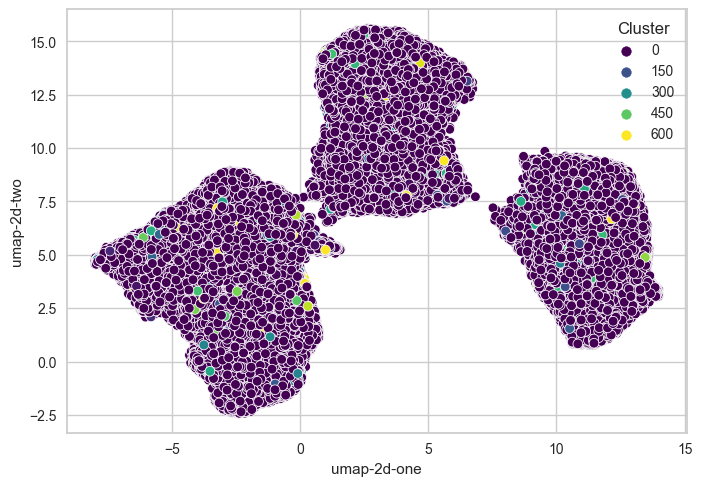

In [86]:
test = umapData.copy()
test['Cluster'] = clusters
sns.scatterplot(x="umap-2d-one", y="umap-2d-two", hue = 'Cluster',  data=test, palette='viridis')